In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [3]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [4]:
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root="MNIST_data/",
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

## **AutoEncoder**

In [18]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.linear = nn.Linear(784, 256)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.linear = nn.Linear(256, 784)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = Encoder()
    self.decoder = Decoder()

  def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return z, x_hat

In [19]:
model = AutoEncoder().to(device)

In [20]:
optimizer = optim.Adam(model.parameters(), lr=0.001) # set optimizer

In [21]:
criterion = nn.MSELoss()

In [22]:
sample = test_dataset[1051][0].view(-1, 784).to(device)

Epoch : 1 / 30, cost : 0.018965791910886765


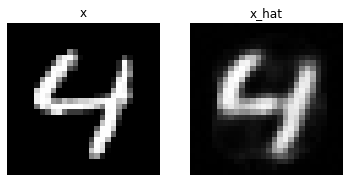

Epoch : 2 / 30, cost : 0.01132714282721281
Epoch : 3 / 30, cost : 0.007959334179759026
Epoch : 4 / 30, cost : 0.006132069043815136
Epoch : 5 / 30, cost : 0.004992660600692034
Epoch : 6 / 30, cost : 0.004214531742036343


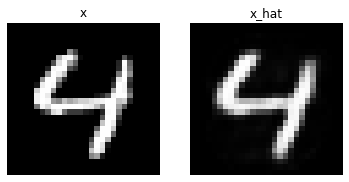

Epoch : 7 / 30, cost : 0.0036551854573190212
Epoch : 8 / 30, cost : 0.0032374064903706312
Epoch : 9 / 30, cost : 0.002908062655478716
Epoch : 10 / 30, cost : 0.002643084852024913
Epoch : 11 / 30, cost : 0.002423156052827835


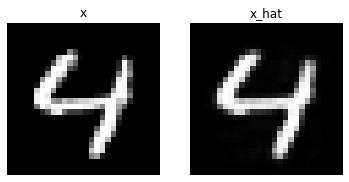

Epoch : 12 / 30, cost : 0.002242277842015028
Epoch : 13 / 30, cost : 0.0020904201082885265
Epoch : 14 / 30, cost : 0.0019601774401962757
Epoch : 15 / 30, cost : 0.001846859697252512
Epoch : 16 / 30, cost : 0.0017482512630522251


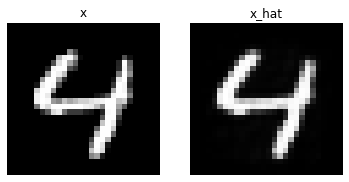

Epoch : 17 / 30, cost : 0.001662963768467307
Epoch : 18 / 30, cost : 0.001589144580066204
Epoch : 19 / 30, cost : 0.0015227627009153366
Epoch : 20 / 30, cost : 0.0014644247712567449
Epoch : 21 / 30, cost : 0.001411821460351348


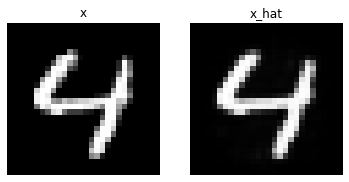

Epoch : 22 / 30, cost : 0.0013634260976687074
Epoch : 23 / 30, cost : 0.001321515184827149
Epoch : 24 / 30, cost : 0.0012812217464670539
Epoch : 25 / 30, cost : 0.0012448604684323072
Epoch : 26 / 30, cost : 0.001211373950354755


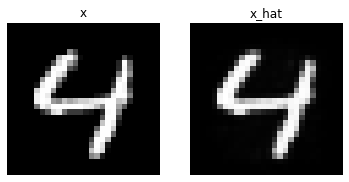

Epoch : 27 / 30, cost : 0.001181253232061863
Epoch : 28 / 30, cost : 0.0011518741957843304
Epoch : 29 / 30, cost : 0.001126463757827878
Epoch : 30 / 30, cost : 0.001102728652767837


In [12]:
epochs = 30

model.train()
for epoch in range(epochs):
  model.train()
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 784).to(device)
    z, b_x_hat = model(b_x) # forward propagation
    loss = criterion(b_x_hat, b_x) # get cost

    avg_cost += loss / total_batch_num
    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update parameters
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

  # observe difference
  if epoch % 5 == 0:
    model.eval()
    fig, ax = plt.subplots(1,2)
    with torch.no_grad():
      test_z, test_output = model(sample)
    ax[0].set_title('x')
    ax[1].set_title('x_hat')

    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[0].imshow(np.reshape(sample.detach().cpu(),(28,28)), cmap='gray')
    ax[1].imshow(np.reshape(test_output.detach().cpu(),(28,28)), cmap='gray')
    plt.show()

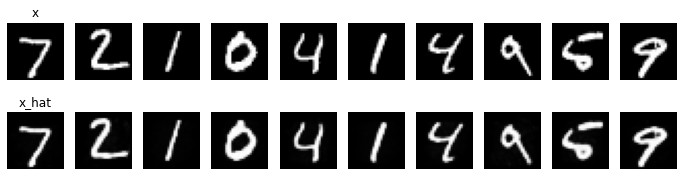

In [15]:
from matplotlib import test
model.eval()
test_samples = torch.zeros((10,28,28))
for i in range(10):
  test_samples[i] = test_dataset[i][0]
test_samples = test_samples.view(-1,784).to(device)
z, test_output = model(test_samples)

fig, ax = plt.subplots(2,10,figsize=(12,3))
ax[0][0].set_title('x')
ax[1][0].set_title('x_hat')
for i in range(10):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(test_samples[i].detach().cpu(),(28,28)), cmap='gray')
  ax[1][i].imshow(np.reshape(test_output[i].detach().cpu(),(28,28)), cmap='gray')
plt.show()

## **Denoising AutoEncoder**

In [16]:
## combine encoder and decoder
class AutoEncoder(nn.Module):
  def __init__(self):
    self.encoder = nn.Sequential(nn.Linear(784,256),
                                 nn.Sigmoid(),)
    self.decoder = nn.Sequential(nn.Linear(256, 784),
                                 nn.Sigmoid(),)
  
  def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return z, x_hat

Epoch : 1 / 30, cost : 0.05236833170056343


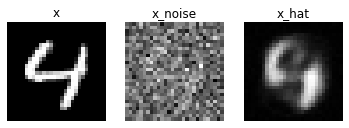

Epoch : 2 / 30, cost : 0.035690002143383026
Epoch : 3 / 30, cost : 0.03264009580016136
Epoch : 4 / 30, cost : 0.03130636364221573
Epoch : 5 / 30, cost : 0.030478985980153084
Epoch : 6 / 30, cost : 0.02994493581354618


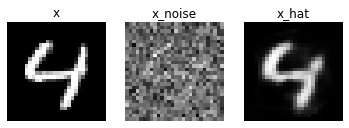

Epoch : 7 / 30, cost : 0.029573429375886917
Epoch : 8 / 30, cost : 0.02926432155072689
Epoch : 9 / 30, cost : 0.02897968888282776
Epoch : 10 / 30, cost : 0.028758425265550613
Epoch : 11 / 30, cost : 0.028579123318195343


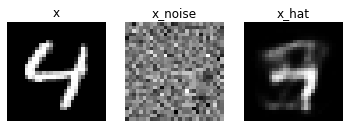

Epoch : 12 / 30, cost : 0.028405413031578064
Epoch : 13 / 30, cost : 0.02829679287970066
Epoch : 14 / 30, cost : 0.028145218268036842
Epoch : 15 / 30, cost : 0.028011761605739594
Epoch : 16 / 30, cost : 0.027923565357923508


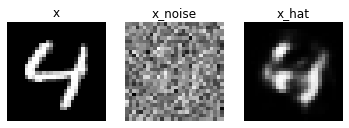

Epoch : 17 / 30, cost : 0.02779441513121128
Epoch : 18 / 30, cost : 0.027652988210320473
Epoch : 19 / 30, cost : 0.02764674834907055
Epoch : 20 / 30, cost : 0.027546925470232964
Epoch : 21 / 30, cost : 0.027483994141221046


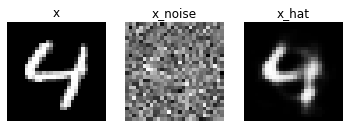

Epoch : 22 / 30, cost : 0.027436600998044014
Epoch : 23 / 30, cost : 0.02737109176814556
Epoch : 24 / 30, cost : 0.027335047721862793
Epoch : 25 / 30, cost : 0.02723587490618229
Epoch : 26 / 30, cost : 0.027145273983478546


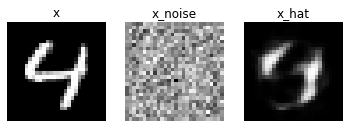

Epoch : 27 / 30, cost : 0.027135878801345825
Epoch : 28 / 30, cost : 0.027068031951785088
Epoch : 29 / 30, cost : 0.02702779322862625
Epoch : 30 / 30, cost : 0.026963461190462112


In [23]:
model.train()
for epoch in range(epochs):
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 784).to(device)
    noise = torch.randn(b_x.shape).to(device)
    noisy_b_x = b_x + noise

    z, b_x_hat = model(noisy_b_x) # forward propagation
    loss = criterion(b_x_hat, b_x) # get cost
    avg_cost += loss / total_batch_num
    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update parameters
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

  # observe difference
  model.eval()
  if epoch % 5 == 0:
    fig, ax = plt.subplots(1,3)
    with torch.no_grad():
      noise = torch.randn(sample.shape).to(device)
      noisy_sample = sample + noise
      test_z, test_output = model(noisy_sample)
    ax[0].set_title('x')
    ax[1].set_title('x_noise')
    ax[2].set_title('x_hat')

    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
    ax[0].imshow(np.reshape(sample.detach().cpu(),(28,28)), cmap='gray')
    ax[1].imshow(np.reshape(noisy_sample.detach().cpu(),(28,28)), cmap='gray')
    ax[2].imshow(np.reshape(test_output.detach().cpu(),(28,28)), cmap='gray')
    plt.show()

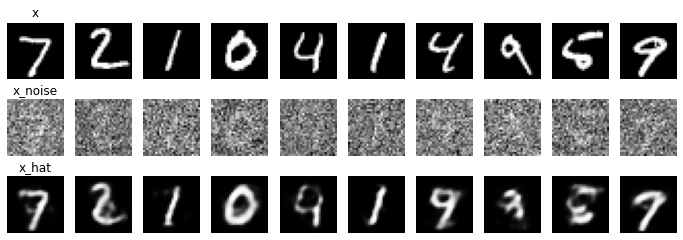

In [25]:
model.eval()
test_samples = torch.zeros((10,28,28))
for i in range(10):
  test_samples[i] = test_dataset[i][0]

noise = torch.randn(test_samples.shape)
noisy_test_samples = test_samples + noise

noisy_test_samples = noisy_test_samples.view(-1, 784).to(device)

z, test_output = model(noisy_test_samples)

fig, ax = plt.subplots(3,10,figsize=(12,4))

ax[0][0].set_title('x')
ax[1][0].set_title('x_noise')
ax[2][0].set_title('x_hat')

for i in range(10):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[2][i].set_axis_off()
   
  ax[0][i].imshow(test_samples[i].detach().cpu(), cmap='gray')
  ax[1][i].imshow(np.reshape(noisy_test_samples[i].detach().cpu(),(28,28)), cmap='gray')
  ax[2][i].imshow(np.reshape(test_output[i].detach().cpu(),(28,28)), cmap='gray')
plt.show()

## **Stacked AutoEncoder**

In [27]:
class Encoder1(nn.Module):
  def __init__(self):
    super(Encoder1, self).__init__()
    self.linear = nn.Linear(784, 256)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class Decoder1(nn.Module):
  def __init__(self):
    super(Decoder1, self).__init__()
    self.linear = nn.Linear(256, 784)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class AutoEncoder1(nn.Module):
  def __init__(self):
    super(AutoEncoder1, self).__init__()
    self.encoder = Encoder1()
    self.decoder = Decoder1()

  def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return z, x_hat

In [28]:
class Encoder2(nn.Module):
  def __init__(self):
    super(Encoder2, self).__init__()
    self.linear = nn.Linear(256, 64)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class Decoder2(nn.Module):
  def __init__(self):
    super(Decoder2, self).__init__()
    self.linear = nn.Linear(64, 256)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    return x

class AutoEncoder2(nn.Module):
  def __init__(self):
    super(AutoEncoder2, self).__init__()
    self.encoder = Encoder2()
    self.decoder = Decoder2()

  def forward(self, x):
    z = self.encoder(x)
    x_hat = self.decoder(z)
    return z, x_hat

In [29]:
autoencoder1 = AutoEncoder1().to(device).train()
autoencoder2 = AutoEncoder2().to(device).train()

In [30]:
optimizer_1 = optim.Adam(autoencoder1.parameters(), lr=0.001) # set optimizer
optimizer_2 = optim.Adam(autoencoder2.parameters(), lr=0.001) # set optimizer 

In [31]:
criterion = nn.MSELoss()

In [32]:
epochs = 30

autoencoder1.train()
for epoch in range(epochs):
  autoencoder1.train()
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 784).to(device)
    z, b_x_hat = autoencoder1(b_x) # forward propagation
    loss = criterion(b_x_hat, b_x) # get cost

    avg_cost += loss / total_batch_num
    optimizer_1.zero_grad()
    loss.backward() # backward propagation
    optimizer_1.step() # update parameters
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 30, cost : 0.04549409821629524
Epoch : 2 / 30, cost : 0.01878030225634575
Epoch : 3 / 30, cost : 0.011243360117077827
Epoch : 4 / 30, cost : 0.007915305905044079
Epoch : 5 / 30, cost : 0.006108584348112345
Epoch : 6 / 30, cost : 0.004984620958566666
Epoch : 7 / 30, cost : 0.004217321053147316
Epoch : 8 / 30, cost : 0.0036656761076301336
Epoch : 9 / 30, cost : 0.003249503206461668
Epoch : 10 / 30, cost : 0.0029197463300079107
Epoch : 11 / 30, cost : 0.0026532646734267473
Epoch : 12 / 30, cost : 0.0024329754523932934
Epoch : 13 / 30, cost : 0.002249962417408824
Epoch : 14 / 30, cost : 0.0020951477345079184
Epoch : 15 / 30, cost : 0.0019633988849818707
Epoch : 16 / 30, cost : 0.0018500261940062046
Epoch : 17 / 30, cost : 0.001751959091052413
Epoch : 18 / 30, cost : 0.0016644822899252176
Epoch : 19 / 30, cost : 0.001588623970746994
Epoch : 20 / 30, cost : 0.0015209941193461418
Epoch : 21 / 30, cost : 0.0014615999534726143
Epoch : 22 / 30, cost : 0.0014080684632062912
Epoch : 23

In [34]:
epochs = 30

autoencoder1.eval() # freeze 1st autoencoder
autoencoder2.train()
for epoch in range(epochs):
  autoencoder2.train()
  avg_cost = 0
  total_batch_num = len(train_dataloader)

  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 784).to(device)
    with torch.no_grad():
      z1, b_x_hat = autoencoder1(b_x) # get latent representation from 1st encoder
    z2, b_x_hat = autoencoder2(z1)
    loss = criterion(b_x_hat, z1) # get cost

    avg_cost += loss / total_batch_num
    optimizer_2.zero_grad()
    loss.backward() # backward propagation
    optimizer_2.step() # update parameters
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 30, cost : 0.047851402312517166
Epoch : 2 / 30, cost : 0.03226395696401596
Epoch : 3 / 30, cost : 0.025587692856788635
Epoch : 4 / 30, cost : 0.022161226719617844
Epoch : 5 / 30, cost : 0.02042231336236
Epoch : 6 / 30, cost : 0.019620880484580994
Epoch : 7 / 30, cost : 0.019219951704144478
Epoch : 8 / 30, cost : 0.018952906131744385
Epoch : 9 / 30, cost : 0.01874411478638649
Epoch : 10 / 30, cost : 0.01857542060315609
Epoch : 11 / 30, cost : 0.01843849942088127
Epoch : 12 / 30, cost : 0.01832231879234314
Epoch : 13 / 30, cost : 0.018225446343421936
Epoch : 14 / 30, cost : 0.01814381033182144
Epoch : 15 / 30, cost : 0.018072614446282387
Epoch : 16 / 30, cost : 0.018011009320616722
Epoch : 17 / 30, cost : 0.017955750226974487
Epoch : 18 / 30, cost : 0.01790626160800457
Epoch : 19 / 30, cost : 0.01786380261182785
Epoch : 20 / 30, cost : 0.017823917791247368
Epoch : 21 / 30, cost : 0.017785167321562767
Epoch : 22 / 30, cost : 0.01775158755481243
Epoch : 23 / 30, cost : 0.017719

In [36]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.linear = nn.Linear(64, 32)
    self.activation = nn.Sigmoid()
    self.cls = nn.Linear(32, 10)
  
  def forward(self, x):
    x = self.linear(x)
    x = self.activation(x)
    x = self.cls(x)
    return x

In [37]:
classifier = Classifier().to(device)

In [38]:
cls_criterion = nn.CrossEntropyLoss()

In [39]:
optimizer = optim.Adam(
    [
     {"params": autoencoder1.parameters(), "lr": 0.001},
     {"params": autoencoder2.parameters(), "lr": 0.001},
     {"params": classifier.parameters(), "lr": 0.001}
    ])

In [41]:
autoencoder1.train()
autoencoder2.train()
classifier.train()
total_batch_num = len(train_dataloader)
epochs = 30

for epoch in range(epochs):
  avg_cost = 0
  
  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 784).to(device)
    z1, b_x_hat = autoencoder1(b_x) # get latent representation from 1st encoder
    z2, b_x_hat2 = autoencoder2(z1) # get latent representation from 2nd encoder
    logits = classifier(z2) # classification
    loss = cls_criterion(logits, b_y.to(device)) # get cost

    avg_cost += loss / total_batch_num

    optimizer.zero_grad()

    loss.backward() # backward propagation

    optimizer.step() # update parameters

  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

Epoch : 1 / 30, cost : 1.21835196018219
Epoch : 2 / 30, cost : 0.3195488154888153
Epoch : 3 / 30, cost : 0.19531115889549255
Epoch : 4 / 30, cost : 0.1448230892419815
Epoch : 5 / 30, cost : 0.1132626086473465
Epoch : 6 / 30, cost : 0.09012061357498169
Epoch : 7 / 30, cost : 0.07418874651193619
Epoch : 8 / 30, cost : 0.060668956488370895
Epoch : 9 / 30, cost : 0.05105045810341835
Epoch : 10 / 30, cost : 0.04116867855191231
Epoch : 11 / 30, cost : 0.03372656926512718
Epoch : 12 / 30, cost : 0.02867491915822029
Epoch : 13 / 30, cost : 0.022533107548952103
Epoch : 14 / 30, cost : 0.01896698959171772
Epoch : 15 / 30, cost : 0.014882518909871578
Epoch : 16 / 30, cost : 0.011844581924378872
Epoch : 17 / 30, cost : 0.009795614518225193
Epoch : 18 / 30, cost : 0.00868181698024273
Epoch : 19 / 30, cost : 0.007748468313366175
Epoch : 20 / 30, cost : 0.008200746960937977
Epoch : 21 / 30, cost : 0.003818640485405922
Epoch : 22 / 30, cost : 0.0027219816111028194
Epoch : 23 / 30, cost : 0.00387197942

In [44]:
correct = 0
total = 0

classifier.eval()
autoencoder1.eval()
autoencoder2.eval()

for b_x, b_y in test_dataloader:
  b_x = b_x.view(-1, 784).to(device)
  with torch.no_grad():
    z1, b_x_hat = autoencoder1(b_x)
    z2, b_x_hat2 = autoencoder2(z1)
    logits = classifier(z2)
  
  predicts = torch.argmax(logits, dim=1)

  total += len(b_y)
  correct += (predicts == b_y.to(device)).sum().item()

print(f'Accuracy of the network on test images: {100 * correct / total} %')

Accuracy of the network on test images: 97.5 %
